In [1]:
from bioinfokit import analys, visuz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
arq1=r'E:\Doc\Cap 1 - Geralzão_Evelu\Transcriptome_Evelu\Transcription_Factors\PlantRegMap\tf_table_total_python.xlsx'

In [7]:
df = pd.read_excel(arq1)
df

,geneID,ID,logFC,adj.P.Val,Pool1,Pool2,Pool3,Pool4,Mean_seed,Pool5,Pool6,Pool7,Pool8,Mean_leaf
0,Evelu_DN10076_c0_g1_i1,MSTRG.67.1,0.000000,0.120063,0.000000,0.000000,0.000000,0.000000,0.000000,52.434140,11.173914,1.278166,45.808728,27.673737
1,Evelu_DN10097_c0_g1_i1,MSTRG.82.1,-3.118236,0.168945,284.415012,293.744795,260.149972,299.389503,284.424821,676.002178,1575.006162,1642.078191,5985.844463,2469.732749
2,Evelu_DN1014_c0_g1_i1,MSTRG.128.1,1.038607,0.011884,3082.949800,3566.212155,2738.941592,1972.231893,2840.083860,1496.530104,1447.967354,1133.368101,1452.315833,1382.545348
3,Evelu_DN1014_c0_g1_i1,MSTRG.128.2,5.655069,0.011284,296.499672,80.847191,187.360758,221.922115,196.657434,0.000000,0.000000,0.000000,15.610796,3.902699
4,Evelu_DN10146_c0_g1_i1,MSTRG.124.1,-1.186329,0.000388,47.998225,64.252241,51.238329,48.293198,52.945498,109.016552,127.210714,117.773872,127.957342,120.489620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,Evelu_DN9897_c0_g1_i1,MSTRG.17914.1,2.109242,0.000129,331.562205,292.184586,347.233141,353.630837,331.152692,59.403235,82.858870,111.383042,53.358212,76.750840
638,Evelu_DN9959_c0_g1_i1,MSTRG.17960.1,-4.866826,0.007520,10.042182,11.063300,5.497675,19.968742,11.642975,413.499614,270.408720,491.363551,183.618786,339.722668
639,Evelu_DN997_c0_g1_i1,MSTRG.17981.1,-2.929546,0.012955,11.744246,37.445015,21.770792,30.590413,25.387617,131.251282,300.492335,131.833699,210.105956,193.420818
640,Evelu_DN9985_c0_g1_i1,MSTRG.17986.2,0.000000,0.043069,0.000000,0.000000,0.000000,0.000000,0.000000,9.623988,17.878262,15.885778,7.805398,12.798357


In [8]:
#2a forma: mais "manual" - Melhor
listapval_inferior=[]
listapval_superior=[]
listaFC_inferior=[]
listaFC_superior=[]

limite_inferior = -2
limite_superior = 2

limite_infeiorp=0.05

for i in range (len(df)):
    if df['logFC'][i]<=limite_inferior and df['adj.P.Val'][i]<=limite_infeiorp:
        listapval_inferior.append(df['adj.P.Val'][i])
        listaFC_inferior.append(df['logFC'][i])
    if df['logFC'][i]>=limite_superior and df['adj.P.Val'][i]<=limite_infeiorp:
        listapval_superior.append(df['adj.P.Val'][i])
        listaFC_superior.append(df['logFC'][i])

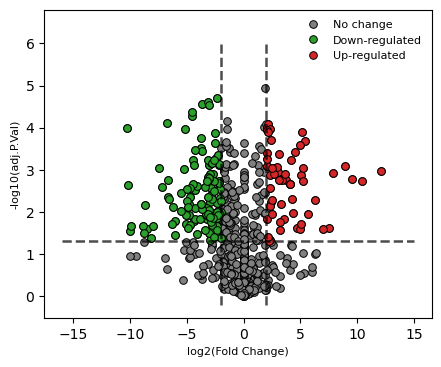

In [9]:
plots_em_x=1
plots_em_y=1
label_size=8
ticksize=10
fig, axs= plt.subplots(plots_em_y,plots_em_x, figsize=(5*plots_em_x, 4*plots_em_y))

#pontos
plt.plot(df['logFC'],-np.log10(df['adj.P.Val']),lw=0,label='No change', marker='o',ms=5.5,mew=0.7, fillstyle='full',markerfacecolor='gray', mec="black")
plt.plot(listaFC_inferior, -np.log10(listapval_inferior),lw=0,label='Down-regulated',marker='o',ms=5.5,mew=0.7, fillstyle='full',markerfacecolor='C2', mec="black")
plt.plot(listaFC_superior, -np.log10(listapval_superior), lw=0,label='Up-regulated',marker='o',ms=5.5,mew=0.7, fillstyle='full',markerfacecolor='C3', mec="black")

#linhas
plt.plot((-16,15),(1.3,1.3), ls="--", color='black',lw=1.8,alpha=0.7)
plt.plot((limite_inferior,limite_inferior),(-0.2,6), ls="--", color='black',lw=1.8,alpha=0.7)
plt.plot((limite_superior,limite_superior),(-0.2,6), ls="--", color='black',lw=1.8,alpha=0.7)

#título dos eixos
axs.set_ylabel(r'-log10(adj.P.Val)',fontsize=label_size)
axs.set_xlabel(r'log2(Fold Change)',fontsize=label_size)

axs.legend(fontsize=label_size, frameon=False)#,bbox_to_anchor=(0.5, 0.4))#loc= 'lower right' )#, )
plt.ylim(None,6.8)
plt.savefig(r'E:\Doc\Cap 1 - Geralzão_Evelu\Transcriptome_Evelu\Transcription_Factors\PlantRegMap\volcanoplot_FTs.pdf',bbox_inches='tight',pad_inches=0.02, transparent=True, dpi=700)